In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import os

In [2]:
# === Part 1: Data Exploration & Preparation ===

# 1. Load and explore the UCI Energy Efficiency dataset
file_path = os.path.join(os.getcwd(), 'ENB2012_data.csv')
df = pd.read_csv(file_path)

# rename columns to descriptive names for clarity
df = df.rename(columns={'X1': 'Relative_Compactness',
                        'X2': 'Surface_Area',
                        'X3': 'Wall_Area',
                        'X4': 'Roof_Area',
                        'X5': 'Overall_Height',
                        'X6': 'Orientation',
                        'X7': 'Glazing_Area',
                        'X8': 'Glazing_Area_Distribution',
                        'Y1': 'Heating_Load',
                        'Y2': 'Cooling_Load'
                        }
               )

# explore the dataset
print("Information about the data")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("Descriptive Statistics")
print(df.describe())

Information about the data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
None

First 5 rows:
   Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0                  0.98         514.5      294


Missing values in each column:
Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

Amount of duplicate rows: 0

Correlation matrix:
                           Relative_Compactness  Surface_Area     Wall_Area  \
Relative_Compactness               1.000000e+00 -9.919015e-01 -2.037817e-01   
Surface_Area                      -9.919015e-01  1.000000e+00  1.955016e-01   
Wall_Area                         -2.037817e-01  1.955016e-01  1.000000e+00   
Roof_Area                         -8.688234e-01  8.807195e-01 -2.923165e-01   
Overall_Height                     8.277473e-01 -8.581477e-01  2.809757e-01   
Orientation                        4.678592e-17 -3.459372e-17 -2.429499e-17   
Glazing_Area                      -2.96055

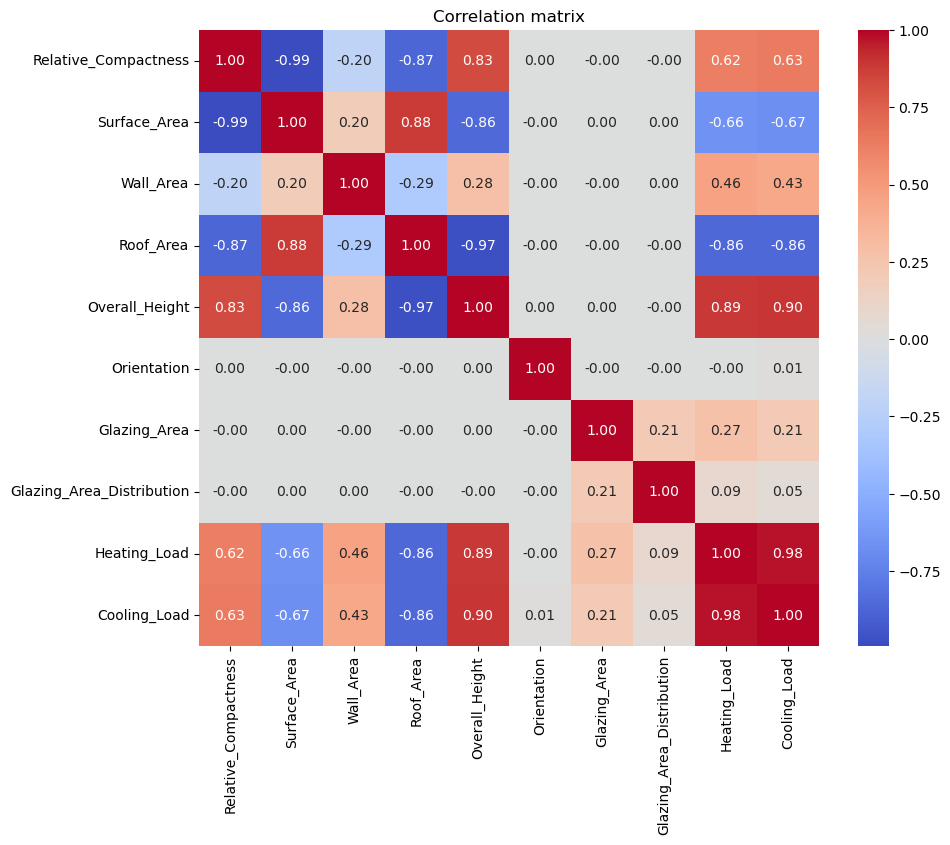

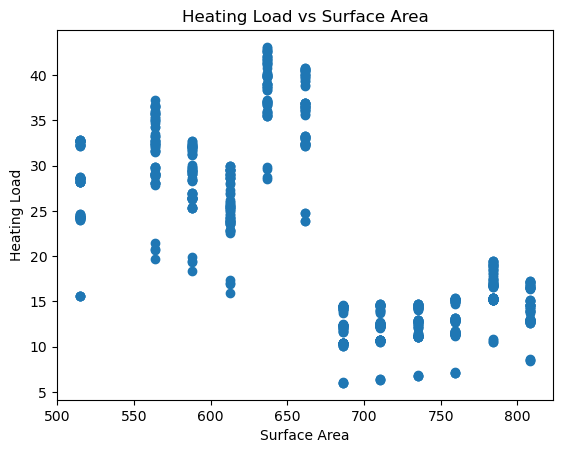

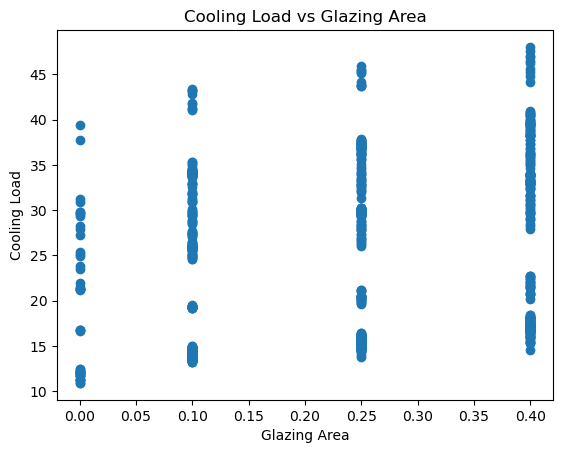

In [3]:
# check for missing values and duplicates
print("\nMissing values in each column:")
print(df.isnull().sum())

duplicates = df.duplicated().sum()
print(f"\nAmount of duplicate rows: {duplicates}")

# 2. Analyze relationships between building features (surface area, glazing, orientation) and energy loads

# correlation matrix
print("\nCorrelation matrix:")
print(df.corr())

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix')
plt.show()


# plot Heating Load vs Surface Area
plt.scatter(df['Surface_Area'], df['Heating_Load'])
plt.xlabel('Surface Area')
plt.ylabel('Heating Load')
plt.title('Heating Load vs Surface Area')
plt.show()

# plot Cooling Load vs Glazing Area
plt.scatter(df['Glazing_Area'], df['Cooling_Load'])
plt.xlabel('Glazing Area')
plt.ylabel('Cooling Load')
plt.title('Cooling Load vs Glazing Area')
plt.show()

In [4]:
# 3. Prepare data for modeling (train/test split, feature selection)
features = ['Surface_Area', 'Wall_Area', 'Glazing_Area', 'Orientation']
X = df[features]

# targets for heating and cooling loads
y_heating = df['Heating_Load']
y_cooling = df['Cooling_Load']

print("\nFeatures (X) summary statistics:")
print(X.describe())

# split data for heating and cooling load prediction
X_train_heat, X_test_heat, y_train_heat, y_test_heat = train_test_split(X, y_heating, test_size=0.3, random_state=42)
X_train_cool, X_test_cool, y_train_cool, y_test_cool = train_test_split(X, y_cooling, test_size=0.3, random_state=42)

# shapes
print("\nHeating Load Prediction:")
print(f"X_train_heat: {X_train_heat.shape}, X_test_heat: {X_test_heat.shape}")
print(f"y_train_heat: {y_train_heat.shape}, y_test_heat: {y_test_heat.shape}")
print("\nCooling Load Prediction:")
print(f"X_train_cool: {X_train_cool.shape}, X_test_cool: {X_test_cool.shape}")
print(f"y_train_cool: {y_train_cool.shape}, y_test_cool: {y_test_cool.shape}")


Features (X) summary statistics:
       Surface_Area   Wall_Area  Glazing_Area  Orientation
count    768.000000  768.000000    768.000000   768.000000
mean     671.708333  318.500000      0.234375     3.500000
std       88.086116   43.626481      0.133221     1.118763
min      514.500000  245.000000      0.000000     2.000000
25%      606.375000  294.000000      0.100000     2.750000
50%      673.750000  318.500000      0.250000     3.500000
75%      741.125000  343.000000      0.400000     4.250000
max      808.500000  416.500000      0.400000     5.000000

Heating Load Prediction:
X_train_heat: (537, 4), X_test_heat: (231, 4)
y_train_heat: (537,), y_test_heat: (231,)

Cooling Load Prediction:
X_train_cool: (537, 4), X_test_cool: (231, 4)
y_train_cool: (537,), y_test_cool: (231,)


Linear Regression (Heating Load): R² = 0.8517, RMSE = 3.8775
Linear Regression Coefficients (Feature Importance - Heating Load):
Glazing_Area    20.632948
Wall_Area        0.140452
Orientation     -0.079942
Surface_Area    -0.089832
dtype: float64


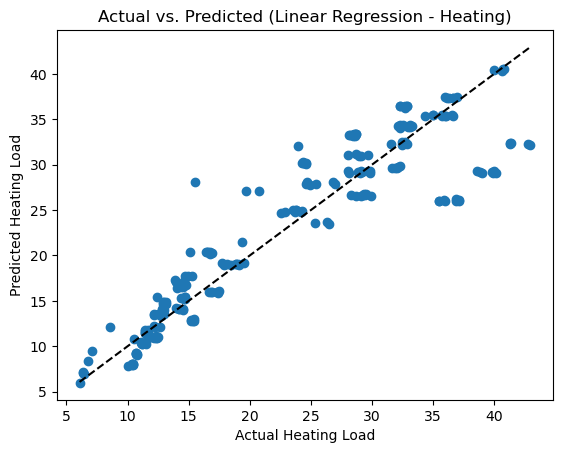


Random Forest (Heating Load): R² = 0.9969, RMSE = 0.5620


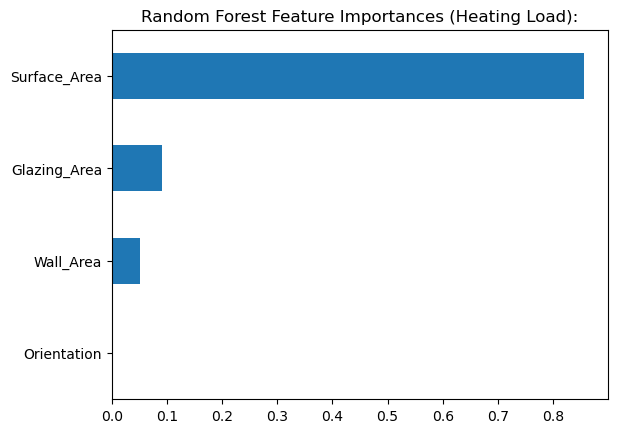

In [5]:
# === Part 2: Model Training & Evaluation ===

# 1. Train at least 2 models e.g. Linear Regression and Random Forest

# Linear Regression model for heating load
lr_heat = LinearRegression()
lr_heat.fit(X_train_heat, y_train_heat)
y_pred_lr_heat = lr_heat.predict(X_test_heat)

# Random Forest model for heating load
rf_heat = RandomForestRegressor(random_state=42)
rf_heat.fit(X_train_heat, y_train_heat)
y_pred_rf_heat = rf_heat.predict(X_test_heat)

# evaluate Linear Regression (Heating Load)
r2_lr_heat = r2_score(y_test_heat, y_pred_lr_heat)
mse_lr_heat = mean_squared_error(y_test_heat, y_pred_lr_heat)
rmse_lr_heat = np.sqrt(mse_lr_heat)
print(f"Linear Regression (Heating Load): R² = {r2_lr_heat:.4f}, RMSE = {rmse_lr_heat:.4f}")

# feature importance for Linear Regression
print("Linear Regression Coefficients (Feature Importance - Heating Load):")
lr_heat_importance = pd.Series(lr_heat.coef_, index=X_train_heat.columns)
print(lr_heat_importance.sort_values(ascending=False))

# scatter plot Linear Regression (Heating)
plt.scatter(y_test_heat, y_pred_lr_heat)
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.title('Actual vs. Predicted (Linear Regression - Heating)')
plt.plot([y_test_heat.min(), y_test_heat.max()], [y_test_heat.min(), y_test_heat.max()], 'k--')
plt.show()

# evaluate Random Forest (Heating Load)
r2_rf_heat = r2_score(y_test_heat, y_pred_rf_heat)
mse_rf_heat = mean_squared_error(y_test_heat, y_pred_rf_heat)
rmse_rf_heat = np.sqrt(mse_rf_heat)
print(f"\nRandom Forest (Heating Load): R² = {r2_rf_heat:.4f}, RMSE = {rmse_rf_heat:.4f}")

# feature importance for Random Forest (Heating Load)
importances = pd.Series(rf_heat.feature_importances_, index=X_train_heat.columns)
importances.sort_values().plot(kind='barh')
plt.title('Random Forest Feature Importances (Heating Load):')
plt.show()


In [6]:
# Linear Regression model for cooling load
lr_cool = LinearRegression()
lr_cool.fit(X_train_cool, y_train_cool)
y_pred_lr_cool = lr_cool.predict(X_test_cool)

# Random Forest model for cooling load
rf_cool = RandomForestRegressor(random_state=42)
rf_cool.fit(X_train_cool, y_train_cool)
y_pred_rf_cool = rf_cool.predict(X_test_cool)

# evaluate Linear Regression (Cooling Load)
r2_lr_cool = r2_score(y_test_cool, y_pred_lr_cool)
mse_lr_cool = mean_squared_error(y_test_cool, y_pred_lr_cool)
rmse_lr_cool = np.sqrt(mse_lr_cool)
print(f"\nLinear Regression (Cooling Load): R² = {r2_lr_cool:.4f}, RMSE = {rmse_lr_cool:.4f}")

# feature importance for Linear Regression (Cooling Load)
print("Linear Regression Coefficients (Feature Importance - Cooling Load):")
lr_cool_importance = pd.Series(lr_cool.coef_, index=X_train_cool.columns)
print(lr_cool_importance.sort_values(ascending=False))

# Random Forest (Cooling Load)
r2_rf_cool = r2_score(y_test_cool, y_pred_rf_cool)
mse_rf_cool = mean_squared_error(y_test_cool, y_pred_rf_cool)
rmse_rf_cool = np.sqrt(mse_rf_cool)
print(f"\nRandom Forest (Cooling Load): R-squared: {r2_rf_cool:.4f}, RMSE: {rmse_rf_cool:.4f}")

# feature importance for Random Forest (Cooling Load)
print("\nRandom Forest Feature Importances (Cooling Load):")
print(pd.Series(rf_cool.feature_importances_, index=X_train_cool.columns).sort_values(ascending=False))


Linear Regression (Cooling Load): R² = 0.8096, RMSE = 4.1427
Linear Regression Coefficients (Feature Importance - Cooling Load):
Glazing_Area    14.738909
Wall_Area        0.126033
Orientation      0.051542
Surface_Area    -0.086053
dtype: float64

Random Forest (Cooling Load): R-squared: 0.9600, RMSE: 1.8985

Random Forest Feature Importances (Cooling Load):
Surface_Area    0.881281
Wall_Area       0.057831
Glazing_Area    0.052661
Orientation     0.008226
dtype: float64
